# Quantitative Textanalyse: *Wordclouds*

Schön, das Du wieder dabei bist! In diesem *Notebook* wollen wir uns damit beschäftigen, wie man sogannte *Wordclouds* oder *Wortwolken* in R erzeugen kann. 

Hierzu nutzen wir zunächst den Text der Wikipediaseite der Stadt Bielefeld (https://de.wikipedia.org/wiki/Bielefeld)! Mit dieser *Wordcloud* können wir visualisieren, welche Worte auf der Wikipediaseite besonders häufig genannt werden. Oder anders ausgedrückt, wie die **Stadt Bielefeld** auf Wikipedia  dargestellt wird.

## Was sind Wordclouds und für welche Informationen kann man sie gut nutzen?

<img width="440" align = "right" hspace="40" src="WordcloudDataStorytelling.png"/> 


<div style="text-align: left" style=“line-height: 150%“>
<p></p>  
<p> <b>Wortwolken</b> bzw. <b>WordClouds</b> ermöglichen es Texte visuell darzustellen. Die Wortwolke rechts visualisiert unterschiedliche Definitionen des Begriffs <i>Data Storytelling</i>. In unserem Beispiel schauen wir uns hierzu später den <b>Wikipedia Artikel der Stadt Bielefeld</b> an.</p> 
   <p> Es lassen sich auch ganz andere Textformen oder auch Textelemente mit Hilfe von WordClouds visualisieren, egal, ob <i>Wikipedia Artikel</i>, <i>PDF-Dokumente</i>, <i>Twitter-<br>Feeds</i> oder ganze <i>Bücher</i>, fast jede Textform ist nutzbar.</p> 
    

Die Wörter aus denen eine WordCloud besteht sind z.B. unterschiedlich **groß**. Je größer ein Wort in der Wortwolke ist, desto häufiger wird es im zugrundeliegenden Text genutzt. Das größte Wort stellt beispielswiese den *Themenschwerpunkt* eines Textes heraus. Zusammen mit weiteren, etwas kleinern, aber immer noch groß dargestellten Worten der WordCloud lassen sich so vielleicht schon *thematische Zusammenhänge* erkennen oder *besonders relevante Themen* eines Textes.
</div>      

Neben der *Größe* gibt es noch andere Möglichkeiten die Häufigkeit, d.h. wie oft Wörter in einem Text vorkommen zu visualisieren. Beispielsweise über eine **farbliche Kennzeichnung**. Das sieht dann z.B. so aus, dass das meistgenutzte Wort in Rot hervorgehoben wird (natürlich sind auch andere Farben möglich oder die Farbzuordnung wird dem Zufall überlassen).

Hierin liegt die *Stärke von Wortwolken*, ohne dass ganze Bücher gelesen werden müssen oder ohne den ganzen Wikipedia Artikel der Stadt Bielefeld zu lesen, kann mit dieser Visualisierungsform zügig ein erster Eindruck über das relevante Thema bzw. die relevanten Themen eines Textelements gewonnen werden.

Gerade wenn WordClouds in Präsentationen genutzt werden, bieten diese den Vorteil, mehr Aufmerksamkeit auf sich zu ziehen als eine schlichte Auflistung von thematischen Schwerpunkten eines Textes.

In R lassen sich die Möglichkeiten zur Visualisierung einer Wortwolke ganz einfach umsetzten. Egal, ob über die *Größe der Wörter* oder eine *farbliche Unterscheidung* - auch eine Kombination verschiedener Visualisierungsformen ist dabei möglich. R bietet uns die Möglichkeit selbst eine WordCloud zu erstellen.

Die erste Frage die sich jetzt stellt ist: ***wie kann ich einen Text in R einlesen?***

Hierfür gibt es verschiedene Lösungen, abhängig davon in welcher Form der Text vorliegt -über entsprechenden Pakete und Befehle.
    

**Gut zu wissen**: Wir werden Dir in diesem Notebook auch einige Vorgehensweisen zeigen, wie z.B. ein *R-Projekt* anzulegen, die dann besonders wichtig werden, wenn Du mit einer eigenen *RStudio-Installation* und nicht mit einem *Jupyter Notebook* arbeitest.

# WordCloud in R erstellen

## R-Projekt für die WordCloud anlegen
Als erstes erstellen wir in RStudio ein neues *Projekt*. Dazu klickt man auf "File", dann auf "New Project..." und anschließend auf "New Directory". Als "Project Type" wählt man "New Project". Nun geben wir unserem Projekt einen Namen und wählen den Speicherort auf unserem Rechner aus. Den Speicherort bzw. den Speicherpfad merken wir uns, diesen brauchen wir gleich. R erstellt nun ein neues Projekt.

Die Texte, die wir als Dateien vorliegen haben und für die WordCloud nutzen wollen kopieren wir nun in diesen Ordner. Den Wikipedia Eintrag der Stadt Bielefeld haben wir als Textdatei vorliegen, das Dateiformat lässt sich an der Dateiendung .txt erkennen. (Falls die Dateiendung bei Dir  nicht angezeigt wird, kannst Du auch mit einem Rechtsklick auf die Datei unter Eigenschaften den Dateityp nachsehen). Jetzt befindet sich die Datei im Projektordner und wir können beginnen das *Script zum Generieren einer WordCloud* zu erstellen.Du kannst auch ein bestehendes Projekt nutzen, dann muss die Textdatei einfach in den entsprechenden Ordner eingefügt werden.


## Script für die WordCloud: Pakete installieren und laden
Im ersten Schritt installieren wir alle Pakete, die Befehle und Funktionen enthalten, die wir benötigen. Da die **packages** in unserer Jupyter Notebook Umgebung bereits vorintstalliert sind, sind die packages hier auskommentiert. In R selbst müsstest Du sie aber bei der Erstbenutzung zunächst installieren.

Außerdem müssen wir diese Pakte sozusagen in R noch "aktivieren". Das erfolgt mit dem *library* Befehl.

In [1]:
# Installieren der Pakete, die zum  Erstellen einer WordCloud benötigt werden

#install.packages("tm")
#install.packages("SnowballC")
#install.packages("wordcloud")
#install.packages("wordcloud2")
#install.packages("RColorBrewer")
#install.packages("stringi")
#install.packages("Rcpp")


# laden der benötigten Pakete

library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("stringi")
library("Rcpp")


Warning message:
"Paket 'tm' wurde unter R Version 4.1.1 erstellt"
Lade nötiges Paket: NLP

Warning message:
"Paket 'SnowballC' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'wordcloud' wurde unter R Version 4.1.1 erstellt"
Lade nötiges Paket: RColorBrewer

Warning message:
"Paket 'RColorBrewer' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'stringi' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'Rcpp' wurde unter R Version 4.1.1 erstellt"


## Script für die WordCloud: Text einlesen
Wir erstellen zunächst ein Objekt "Wiki-Bielefeld". Diesem Objekt weisen wir unseren Text als Inhalt zu. Hierzu lesen wir den Text in R ein. R liest mit Hilfe des "stri_read_lines" Befehls den Text als Ganzes ein und teilt den Text dabei in einzelne Textzeilen auf. 


In [2]:
# Einlesen des Textes Zeile für Zeile

Wiki_Bielefeld <- stri_read_lines("Bielefeld_Wikipedia_Eintrag.txt")


## Ausprobieren

Las Dir doch einmal das erstellte Objekt "Wiki_Bielefeld" ausgeben. Dann kannst Du die Struktur sehen mit der R den Text aufteilt.

In [3]:
Wiki_Bielefeld

[1] "Bielefeld"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [2] "Zur Navigation springenZur Suche springen"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [3] "\t"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Script für die WordCloud: Textkorpus erstellen
In diesem Schritt fassen wir alle Texte, die wir in R mit den ersten drei Schritten eingelesen haben, zu einem **Textkorpus** zusammen. Bei unserem Beispiel handelt sich dabei nur um die Textdatei mit dem *Wikipedia Eintrag der Stadt Bielefeld*. Wenn wir zum Beispiel eine WordCloud zu allen Städten mit mehr als 100.000 Einwohner:innen in OWL erstellen wollen, würden wir z.B. auch die Wikipedia Artikel der Städte Gütersloh und Paderborn zum Textkorpus hinzufügen, nachdem wir sie für R lesbar gemacht haben. Den so zusammengefassten Korpus weisen wir dem Objekt "docs" zu.

In [4]:
#Daten als Corpus laden, auch für mehrere Dateien ist das notwendig

docs <- Corpus(VectorSource(Wiki_Bielefeld))


#Hier kannst Du Dir den erstellten Daten-Corpus noch einmal mit ansehen, 
# gerade bei mehreren Dateien, die zu einem Daten-Corpus zusammengefasst werden ist das ratsam

inspect (docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 926

  [1] Bielefeld                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## Script für die WordCloud: Matrix anlegen und sortierten Datensatz erstellen

Mit Hilfe des "docs" Objektes können wir nun eine Matrix mit den Wörtern aus unseren Texten anlegen. So wird die Frequenz bzw. die Häufigkeit mit der die Wörter in unserem Texten vorkommt zählbar gemacht. Außerdem werden die Wörter nach der Häufigkeit ihres Vorkommens sortiert. Beginnend beim Wort mit der höchsten Frequenz wird eine *absteigende Liste* erstellt. Diese sortierte Liste wird anschließend in einen eigenen Datensatz "d" geschrieben. Auf diesem basiert dann im nächsten Schritt unsere WordCloud.

In [5]:
# hier wird eine Matrix angelegt, die die Häufigkeit der Begriffe aus den Texten zählbar macht
# anlegen der Dokumenten-Matrix und Objektzuweisung

dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)


# absteigende Sortierung erstellen beginnend mit dem Wort, dass am meisten vorkommt
v <- sort(rowSums(m),decreasing=TRUE)

# Datensatz erstellen, der die Wörter mit ihrer Freqenz enthält und nach der vorher angelegten Sortierung sortiert ist
d <- data.frame(word = names(v),freq=v)


## Script für die WordCloud:  WordCloud erstellen
Jetzt können wir mit dem Dataframe **"d"** als Basis eine Wordcloud erstellen. Als erstes legen wir den ***Seed*** fest, d.h. die WordCloud wird sozusagen immer nach dem gleichen Schema erstellt, der Vorteil hierbei ist, dass so die WordCloud reproduzierbar ist und nicht jedes mal mit einem *neuen* Aussehen erstellt wird.

Dann legen wir fest, dass unsere WordCloud aus den Wörtern, die in unserem Dataframe enthalten sind besteht **(d\\$words)** und dabei nach der Freqenz der Worthäufigkeiten strukturiert ist **(d\\$freq)**. Über **"min.freq"** legen wir fest, wie oft  ein Wort mindestens in unserem Datensatz **"d"** vorkommen muss, damit es in die WortCloud übernommen wird. Wir können auch begrenzen, aus wievielen Wörtern die WordCloud besteht. 

Die Anordnung der Wörter kann zufällig erfolgen. Wir lassen unsere Wortwolke aber nicht zufällig erstellen. Dies erfolgt über  **"random.order=FALSE".** Mit dem Wert 0.35 (35%) legen wir fest, welcher Anteil an Wörtern  nicht waagerecht dargestellt wird. Der letzte Ausdruck legt die Farbauswahl für die WordCloud fest.

*Was fällt Dir beim Erstellen der WordCloud auf?* 

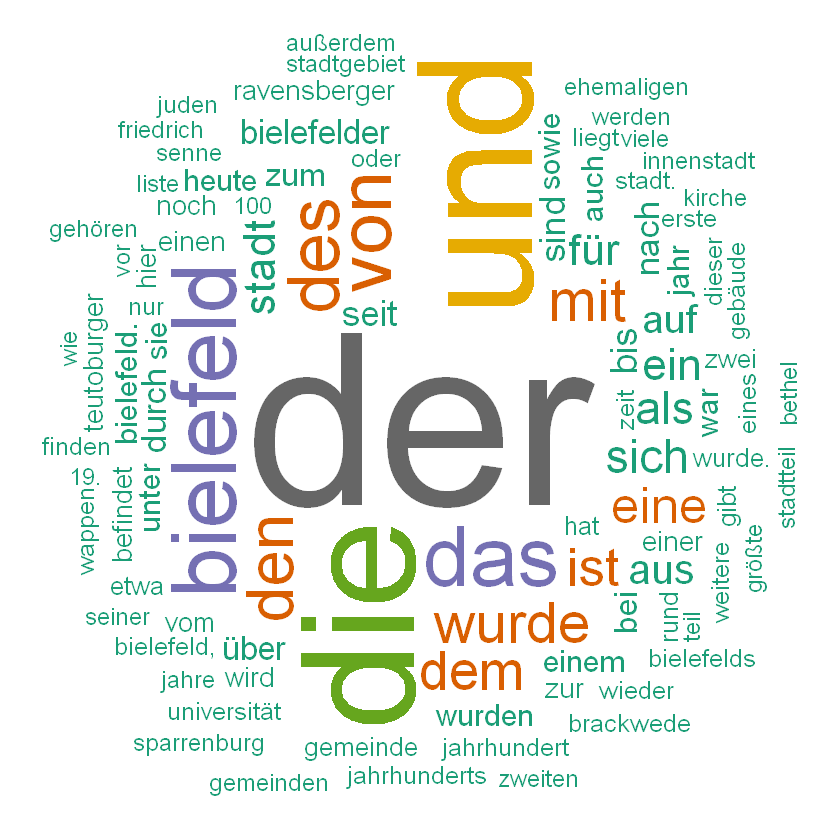

In [6]:
# festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
# bei jeder Erstellung zufällig erstellt wird

set.seed(1234)

# Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am größten dargestellt
# die minimale Frequenz damit ein Wort dargestellt wird ist 1
# die WordCloud besteht aus max. 100 Wörtern (max.Words)
# die Anordnung ist nicht zufällig
# rot.per --> legt fest welcher Anteil an Wörtern nicht waagerecht dargestellt wird

Wortwolke1 <- wordcloud(words = d$word, freq = d$freq,scale=c(12,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))
          


## Stop Words - "Stopp-Wörter" und weitere Aufbereitung

**Die erstellte WordCloud ist noch nicht so richtig aussagekräftigt!** 

Die Wörter, die am häufigsten vorkommen sind ***der, die, das, und*** und ähnliche. Diese Wörter kommen gerade in deutschen Texten sehr oft vor, sind für die WordCloud aber nicht sehr aussagekräftig. Um die Texte, die wir benutzen, von diesen *Füllwörtern* zu befreien gibt es für R *Stop-Word-Listen*. Diese entfernen alle gängigen Wörter, wie eben *der, die, das, und* aus der Liste der Wörter, die in die WordCloud übernommen werden. 

Hierzu weisen wir unserem erstellten Korpus-Objekt "docs" mit einem Befehl einfach diese Stopp-Liste zu und die Wörter der Liste fallen aus der Wertung. Diese *Stop-Word-Listen* gibt es dabei für verschiedene Sprachen.

Außer den Stopp-Wörtern ist es außerdem sinnvoll *Zahlen*, (z.B. ausgeschriebene Jahreszahlen wie "1995"), *überflüssige Leerzeichen* oder auch die *Zeichensetzung* zu entfernen, um möglichst nur auf die relevanten Informationen und die relevanten Wörter zuzugreifen. 

Analysiert man beispielsweise einen Twitter-Feed ist es außerdem sinnvoll weitere Sonderzeichen wie "#" Hashtags zu entfernen oder auch das "@"-Zeichen. Zusätzlich kann man alle Buchstaben als Kleinbuchstaben definieren um ein einheitliches Schriftbild zu erhalten.
Diese Bereinigungen weisen wir hierzu nach und nach unserem Korpus-Objekt zu. 

***Schau Dir die WordCloud an, die nach der Aufbereitung entsteht. Was fällt Dir auf?***

Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("german")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"


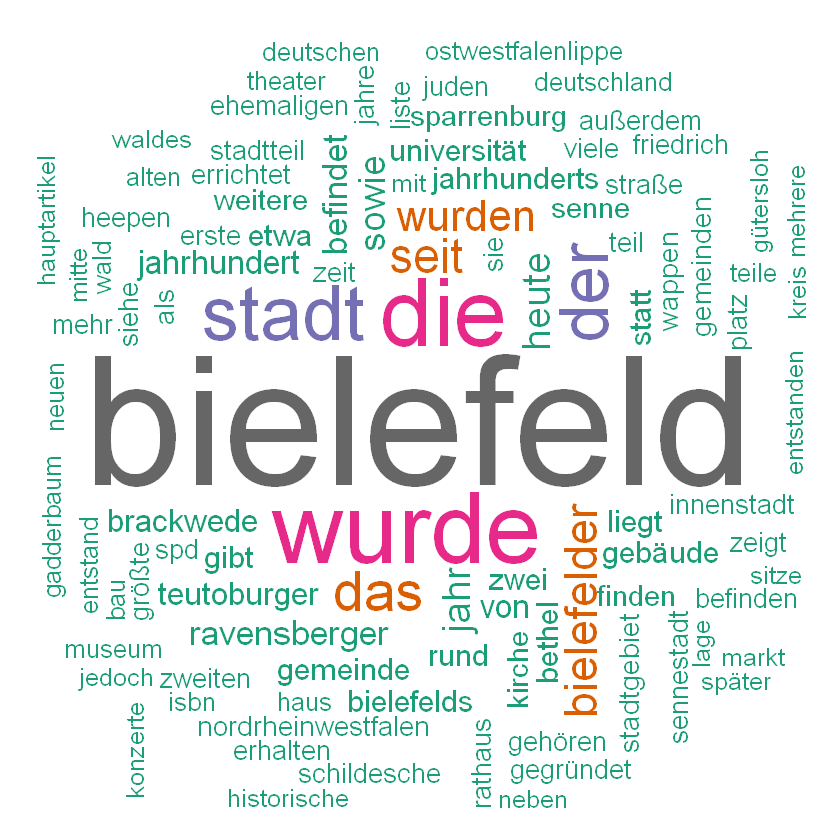

In [7]:
###Stop Words - "Stopp-Wörter" und weitere Aufbereitung###


#Stoppwörter entfernen z.B. der, die, das, und usw. Deutsch und Englisch
docs <- tm_map(docs, removeWords, stopwords("english"))
docs <- tm_map(docs, removeWords, stopwords("german"))


#Zahlen entferne
docs <- tm_map(docs, removeNumbers)

#Überschüssige Leerzeichen entfernen
docs <- tm_map(docs, stripWhitespace)

#Zeichensetzung entfernen
docs <- tm_map(docs, removePunctuation)

#Text aufbereiten entfernen von Sonderzeichen
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")


#alle Großbuchstaben werden zu Kleinbuchstaben 
docs <- tm_map(docs, content_transformer(tolower))



#Hier wird eine Matrix angelegt, die die Häufigkeit der Begriffe aus den Texten zählbar macht
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)


#Festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
#bei jeder Erstellung zufällig erstellt wird
set.seed(1234)


#Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am größten dargestellt
#die minimale Frequenz damit ein Wort dargestellt wird ist 1
#die WordCloud besteht aus max. 100 Wörtern (max.Words)
#die Anordnung ist nicht zufällig
#rot.per --> legt fest welcher Anteil an Wörtern nicht waagerecht dargestellt wird
wordcloud2 <- wordcloud(words = d$word, freq = d$freq, scale=c(8,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))


## Eigene Stopwords
 Wie Du in der zuletzt erstellten WordCloud siehst, reicht je nach Text die Aufbereitung mit den vordefinierten *Stoppwörter-Listen* noch nicht aus und wir finden immer noch Wörter, die unsere WordCloud in ihrer Aussagefähigkeit einschränken. Um auch diese Wörter aus der WordCloud auszuschließen zu können, können wir eigene Wörter als "Stop Words" definieren. Diese Liste weisen wir wiederum auch unserem "docs" Objekt zu.

Warning message in tm_map.SimpleCorpus(docs, removeWords, c("sowie", "wurden", "seit", :
"transformation drops documents"


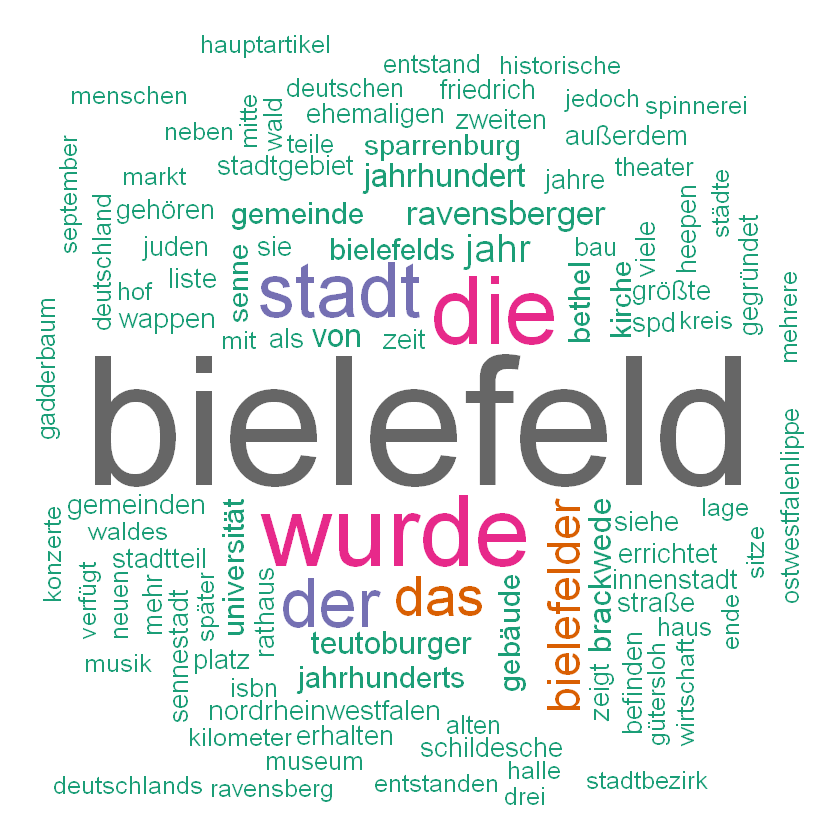

In [8]:
###Eigene Stop-Words###
docs <- tm_map(docs, removeWords, c("sowie", "wurden", "seit", "heute", "heut", 
                "teil", "befindet", "weiter", "erst", "etwa", "rund", "gibt", 
                "liegt", "zwei", "statt", "weitere", "finden", "erste")) 



#Hier wird eine Matrix angelegt die die Häufigkeit der Begriffe aus den Texten zählbar macht
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)


#Festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
#bei jeder Erstellung zufällig erstellt wird
set.seed(1234)


#Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am größten dargestellt
#die minimale Frequenz damit ein Wort dargestellt wird ist 1
#die WordCloud besteht aus max. 100 Wörtern (max.Words)
#die Anordnung ist nicht zufällig
#rot.per --> legt fest welcher Anteil an Wörtern nicht waagerecht dargestellt wird
wordcloud3 <-wordcloud(words = d$word, freq = d$freq,scale=c(8,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Ausprobieren
In der Liste mit den eigenen "Stop-Words" fehlen noch ein paar Wörter. Füge die Wörter zur Liste hinzu und lass Dir die neue WordCloud ausgeben.

In [ ]:
###Eigene Stop-Words###
docs <- tm_map(docs, removeWords, c("sowie", "wurden", "seit", "heute", "heut",
                "teil","befindet", "weiter", "erst", "etwa", "rund", "gibt", "liegt",
                "zwei","statt",  "weitere", "finden", "erste","siehe", "wurde",
                "viele","jedoch","mehrere","isbn")) 



#Hier wird eine Matrix angelegt die die Häufigkeit der Begriffe aus den Texten zählbar macht
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)


#Festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
#bei jeder Erstellung zufällig erstellt wird
set.seed(1234)


#Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am größten dargestellt
#die minimale Frequenz damit ein Wort dargestellt wird ist 1
#die WordCloud besteht aus max. 100 Wörtern (max.Words)
#die Anordnung ist nicht zufällig
#rot.per --> legt fest welcher Anteil an Wörtern nicht waagerecht dargestellt wird
wordcloud3 <-wordcloud(words = d$word, freq = d$freq, scale=c(9,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Hinweis
Es gibt darüberhinaus die Möglichkeit mit einem weiteren Befehl Wörter auf ihren Wortstamm zu reduzieren. Beispielsweise werden so die Worte "Bielefeld" und "Bielefelder" zusammengefasst. Das kann je nach Forschungsinteresse oder Fragestellung durchaus nützlich sein. Wir verzichten hier jedoch auf diesen Befehl, dieser führt stellenweise nämlich auch zur "Verfälschung" von Wörtern und kürzt unter anderem Wortendungen weg. Den entsprechenden Befehl und die WordCloud die mit ihm ausgegeben wird siehst Du, wenn Du das folgende Skript ausführst.

Warning message in tm_map.SimpleCorpus(docs, stemDocument):
"transformation drops documents"


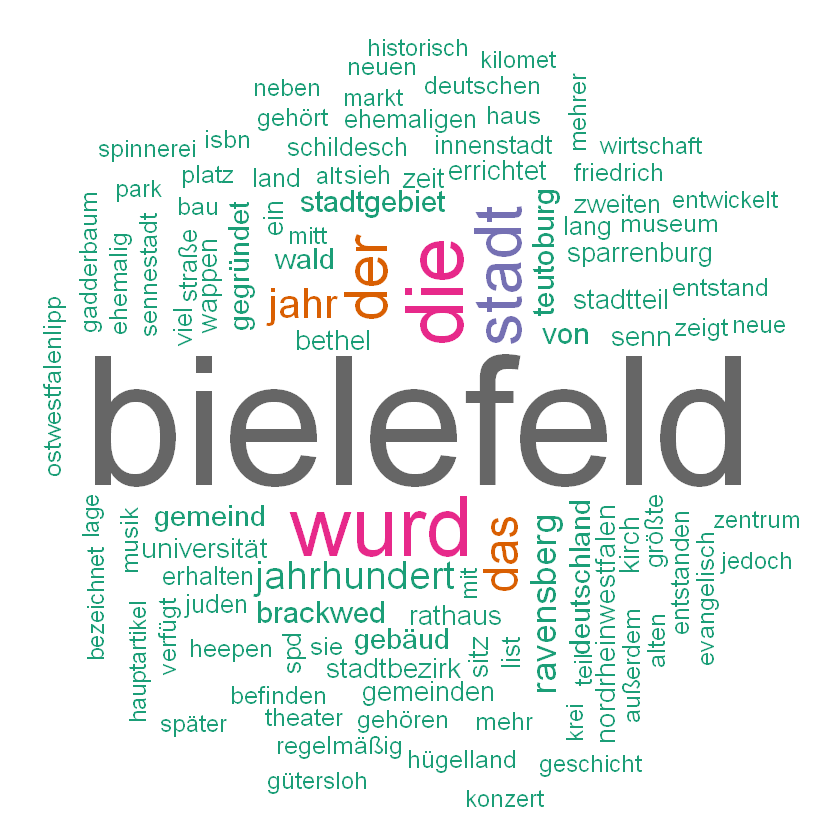

In [9]:
###Hinweis###

#Wörter auf ihren Wortstamm reduzieren, sodass beispielsweise Bielfelder und Bielefeld zusammengefasst werden
docs <- tm_map(docs, stemDocument)




#Hier wird eine Matrix angelegt die die Häufigkeit der Begriffe aus den Texten zählbar macht
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)


#Festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
#bei jeder Erstellung zufällig erstellt wird
set.seed(1234)


#Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am größten dargestellt
#die minimale Frequenz damit ein Wort dargestellt wird ist 1
#die WordCloud besteht aus max. 100 Wörtern (max.Words)
#die Anordnung ist nicht zufällig
#rot.per --> legt fest welcher Anteil an Wörtern nicht waagerecht dargestellt wird
wordcloud(words = d$word, freq = d$freq, scale=c(8,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

# Websites direkt auslesen und eine WordCloud erstellen
Mit R lassen sich nicht nur Textdateien auswerten, Du kannst auch direkt auf **Websites** zugreifen und die Texte dort für die Erstellung von WordClouds nutzen. An den Befehlen für die Aufbereitung der Texte ändert sich soweit nichts, es gibt ein paar Ergänzungen, aber den generellen Ablauf kennen wir schon aus der Erstellung der WordCloud auf Basis von Textdokumenten Textdokumenten.

Wir benötigen allerdings einige neue zusätzliche R Funktionen und Befehle. Hierzu installieren und laden wir einige neue Pakete.

In [10]:
#benötigte Pakete
library("rvest")
library("dplyr")
library("htmltools")
library("tm")
library("SnowballC")
library("wordcloud")
library("wordcloud2")
library("RColorBrewer")
library("stringi")
library("magrittr") 
library("dplyr")    
library("ggplot2")
library("xml2")


Warning message:
"Paket 'rvest' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.1.1 erstellt"

Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Paket 'wordcloud2' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'magrittr' wurde unter R Version 4.1.1 erstellt"
Warning message:
"Paket 'ggplot2' wurde unter R Version 4.1.1 erstellt"

Attache Paket: 'ggplot2'


Das folgende Objekt ist maskiert 'package:NLP':

    annotate


Warning message:
"Paket 'xml2' wurde unter R Version 4.1.1 erstellt"


## Websites mit R lesen
Um Websites mit R zu lesen benötigen wir zunächst die URL bzw. die Adresse der Seite, die wir nutzen möchten. Wir bleiben bei unserem Beispiel dem Wikipedia Eintrag der Stadt Bielefeld.

Dieser ist unter der Adresse https://de.wikipedia.org/wiki/Bielefeld zu erreichen.


## URL Adresse 
Die URL-Adresse definieren wir als eigenes Objekt, somit müssen wir nicht immer den kompletten Link angeben. Das neuerstellte Objekt ist "Wiki_Bi_Eintrag".

## HTML und XML einlesen
Textdokumente wie .txt-Dateien und Websites unterscheiden sich in Bezug auf ihre Formatierung, da es sich um völlig unterschiedliche Quellen für das "gleiche" Textelement handelt. Um die Website mit R einzulesen nutzen wir daher den read_html Befehl um das Format der Website für R nutzbar zu machen. Den Inhalt den wir damit auslesen, weisen wir dem neuen Objekt Wiki_Bi_html zu. 

In [11]:
#Abrufen des Wikipedia Artikels der Stadt Bielefeld über die URL 
Wiki_Bi_Eintrag <- "https://de.wikipedia.org/wiki/Bielefeld"


Wiki_Bi_html <- read_html(Wiki_Bi_Eintrag)

Wiki_Bi_html
str(Wiki_Bi_html)

{html_document}
<html class="client-nojs" lang="de" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject  ...

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


### Kurzer Exkurs: Quellcode
Um von einer Website nur den relevanten Text für die **WordCloud** zu nutzen, ist ein Blick in den Quellcode der Website notwendig. Keine Sorge, das klingt komplizierter als es eigentlich ist. 

Öffne in einem Browser Deiner Wahl (*Firefox, Google Chrome, Opera, Microsoft Edge*) den Wikipedia Eintrag der Stadt Bielefeld. Jetzt klickt mit der rechten Maustaste irgendwo auf die Seite z.B. neben das Wappen von Bielefeld. In dem Kontextmenü, das sich öffnet klickst Du auf "Untersuchen". In Eurem Browser öffnet sich jetzt ein neues Menü neben dem Wikipedia Eintrag. Dieses Fenster zeigt an, aus welchen Elementen die Seite besteht. 

Ganz oben in dem neuen Menü ist ein Button auf dem ein kleiner Mauszeiger zu sehen ist. Wenn Du auf diesen Button klickt leuchtet dieser Blau und ist aktiviert. Sobald Du irgendwo anders draufklickst deaktiviert sich dieser Button wieder. Lass den Button aktiviert und fahr einfach über den Wikipedia-Eintrag ohne etwas anzuklicken. 

Es leuchten  verschiedene Kästchen Blau auf und teilweise sind die auch noch mit einem Orangen-Rahmen versehen. Wenn Du z.B. den Mauszeiger auf das Wikipedia Logo bewegst ist dieses blau hinterlegt. Außerdem siehst Du unter dem Logo eine kleine Textbox, der Titel dieser Box lautet:"a.mw-wiki-logo". Das ist sozusagen die Adresse des Logos auf der Website. 
Für die WordCloud brauchen wir das Logo oder auch die linke Spalte mit der Sprachauswahl für den Wikipedia Artikel nicht. Wir schauen also unter welcher Adresse auf der Website der Text des Wikipedia Artikels steckt.

Wenn Du den Mauszeiger auf die freie Fläche zwischen "Inhaltsverzeichnis" und der Tabelle mit den "Basisdaten" auf der rechten Seite bewegst, leuchtet der ganze Text blau auf bzw. ist blau hinterlegt.
Das ist die für uns relvante Adresse auf der Website des Wikipedia Eintrags der Stadt Bielefeld: "div.mw.parser-output".
Das "div" können wir streichen für das einlesen in R reicht uns der nachstehende Adressteil: **.mw.parser-output.** Mit dieser Adresse aus der Seitenstruktur des Wikipedia-Eintrags können wir nun weiter arbeiten.

## Einlesen des relevanten Textelements von einer Website
Nachdem wir ermittelt haben, wo genau der Text, der uns interessiert, auf der Webseite zu finden ist, können wir diesen als Text in R einlesen. Hierzu schreiben wir den Text in ein neues Objekt, sodass dieses Objekt nur noch den Text beinhaltet. Dies gelingt uns mit dem folgenden Skript. Anschließend geben wir das Objekt zur Überprüfung aus. 

In [12]:
#Einlesen des Inhaltes / Textes --> über den Pfad .mw-parser-output 
#hierzu ist ein Auslesen des Quellcodes der Internetseite notwendig

Wiki_Bi_Text <-(Wiki_Bi_html %>%
                  html_node(".mw-parser-output") %>%
                  html_text())


#Ausgabe des Textes zur Überprüfung
Wiki_Bi_Text

[1] "\n\n\nDieser Artikel befasst sich mit der Stadt in Nordrhein-Westfalen. Zu weiteren Bedeutungen siehe Bielefeld (Begriffsklärung).\n\nWappen\n\nDeutschlandkarte\n\n\n\n\n52.021828.53509118Koordinaten: 52° 1' N, 8° 32' O\n\nBasisdaten\nBundesland:\nNordrhein-Westfalen\nRegierungsbezirk:\n\nDetmold\nHöhe:\n\n118 m ü. NHN\nFläche:\n\n258,83 km2Einwohner:\n\n333.509 (31. Dez. 2020)[1]Bevölkerungsdichte:\n\n1289 Einwohner je km2Postleitzahlen:\n\n33602 – 33739\nVorwahlen:\n\n0521, 05202, 05203, 05205, 05206, 05208, 05209\nKfz-Kennzeichen:\n\nBI\nGemeindeschlüssel:\n\n05 7 11 000\nLOCODE:\n\nDE BFE\nNUTS:\n\nDEA41\nStadtgliederung:\n\n10 Stadtbezirke\nAdresse derStadtverwaltung:\n\nNiederwall 2333602 Bielefeld\nWebsite:\n\nwww.bielefeld.de\nOberbürgermeister:\n\nPit Clausen (SPD)\nLage von Bielefeld in Nordrhein-Westfalen\n\n  Sparrenburg und Blick auf die Innenstadt\n  Niederwall mit Blick auf das Stadttheater\nBielefeld  [.mw-parser-output .IPA a{text-decoration:none}'bi<U+02D0>l<U+0259>f<U+025B>lt] (ostwestfälisch Builefeld, Bielefeld, Beilefeld oder Builefeild) ist eine kreisfreie Großstadt im Regierungsbezirk Detmold im Nordosten Nordrhein-Westfalens. Mit über 334.000 Einwohnern ist sie die größte Stadt der Region Ostwestfalen-Lippe und deren wirtschaftliches Zentrum. In Nordrhein-Westfalen ist Bielefeld die achtgrößte Stadt. In der Landesplanung ist Bielefeld als Oberzentrum eingestuft. Auf der Liste der Großstädte in Deutschland steht es der Bevölkerung nach an 18. Stelle und der Fläche nach an 11. Stelle.\nDie erste Erwähnung lässt sich auf den Anfang des 9. Jahrhunderts datieren,[2] als Stadt wird sie erstmals 1214 bezeichnet. Am Nordende eines Quertals des Teutoburger Waldes gelegen, sollte die Kaufmannsstadt den Handel in der Grafschaft Ravensberg fördern, deren größter Ort sie wurde. Bielefeld war lange Zeit das Zentrum der Leinenindustrie. Heute ist die Stadt vor allem Standort der Nahrungsmittelindustrie, von Handels- und Dienstleistungsunternehmen, der Druck- und Bekleidungsindustrie und des Maschinenbaus. Überregional bekannt sind ihre Universität, die v. Bodelschwinghschen Stiftungen Bethel, die Dr. August Oetker KG und der Bundesligaclub Arminia Bielefeld.\n\nInhaltsverzeichnis\n1 Geographie\n1.1 Geographische Lage\n1.2 Stadtgliederung\n1.3 Ausdehnung und Nutzung des Stadtgebiets\n1.4 Nachbargemeinden\n1.5 Geologie\n1.6 Klima\n\n2 Geschichte\n2.1 Eingemeindungen\n2.2 Einwohnerentwicklung\n\n3 Politik\n3.1 Kommunalpolitik\n3.2 Wappen\n3.3 Städtepartnerschaften\n3.4 Bundespolitik\n3.5 Landespolitik\n\n4 Sehenswürdigkeiten\n4.1 Sakralbauten\n4.2 Profanbauten\n4.2.1 Bürgerliche Wohnbauten\n4.2.2 Adelshöfe\n4.2.3 Wiederverwendete Reste zerstörter Bauten\n4.2.4 Stadtmauer\n4.2.5 Weitere Bauten\n\n4.3 Grünflächen und Naherholung\n\n5 Kultur\n5.1 Religionsgemeinschaften\n5.1.1 Konfessionsstatistik\n5.1.2 Christentum\n5.1.2.1 Protestantismus\n5.1.2.2 Katholizismus\n5.1.2.3 Andere Konfessionen\n\n5.1.3 Judentum\n5.1.4 Islam\n5.1.5 Jesidentum\n\n5.2 Museen\n5.3 Theater\n5.3.1 Kabarett\n\n5.4 Musik\n5.5 Veranstaltungsorte\n5.6 Kinos\n5.7 Kulturpreis der Stadt Bielefeld\n5.8 Sport\n5.9 Regelmäßige Veranstaltungen\n5.9.1 Volks- und Straßenfeste, Märkte\n5.9.2 Kunst, Musik, Film, Literatur\n5.9.3 Gesellschaft und Wissenschaft\n5.9.4 Spiel- und Kinderveranstaltungen\n5.9.5 Sportveranstaltungen\n\n5.10 Regionale Spezialitäten\n5.11 Bielefeld-Verschwörung\n\n6 Wirtschaft und Infrastruktur\n6.1 Wirtschaft\n6.2 Verkehr\n6.2.1 Schienen- und Busverkehr\n6.2.2 Straßenverkehr\n6.2.3 Flugverkehr\n6.2.4 Fahrradverkehr\n\n6.3 Öffentliche Einrichtungen\n6.4 Medien\n6.5 Bildung\n6.6 Wasserversorgung\n6.7 Open Innovation City\n\n7 Persönlichkeiten\n7.1 Ehrenbürger\n7.2 Söhne und Töchter der Stadt\n7.3 Weitere Persönlichkeiten\n\n8 Siehe auch\n9 Literatur\n10 Weblinks\n11 Fußnoten\n12 Einzelnachweise\n\n\nGeographie\nGeographische Lage\n  Der Bielefelder Pass von der Hünenburg\n  Fernmeldeturm Hünenburg\nBielefeld liegt auf der Wasserscheid

## Text Ausgabe
Dir ist bestimmt aufgefallen, dass der Text den Du gerade ausgegeben hast noch etwas chaotisch aussieht. Das liegt unter anderem daran, das z.B. auch die Zeilenumbrüche "\n" im Textelemt als Text vermerkt sind.
Du kannst Dir mit dem nachfolgenden Befehl den Text "ausgeschrieben" ausgeben lassen, dass sieht dann schon deutlich übersichtlicher aus.

In [13]:
#Ausgabe des Textes in Zeilen, das ist wesentlich übersichtlicher
writeLines(Wiki_Bi_Text)




Dieser Artikel befasst sich mit der Stadt in Nordrhein-Westfalen. Zu weiteren Bedeutungen siehe Bielefeld (Begriffsklärung).

Wappen

Deutschlandkarte




52.021828.53509118Koordinaten: 52° 1' N, 8° 32' O

Basisdaten
Bundesland:
Nordrhein-Westfalen
Regierungsbezirk:

Detmold
Höhe:

118 m ü. NHN
Fläche:

258,83 km2Einwohner:

333.509 (31. Dez. 2020)[1]Bevölkerungsdichte:

1289 Einwohner je km2Postleitzahlen:

33602 – 33739
Vorwahlen:

0521, 05202, 05203, 05205, 05206, 05208, 05209
Kfz-Kennzeichen:

BI
Gemeindeschlüssel:

05 7 11 000
LOCODE:

DE BFE
NUTS:

DEA41
Stadtgliederung:

10 Stadtbezirke
Adresse derStadtverwaltung:

Niederwall 2333602 Bielefeld
Website:

www.bielefeld.de
Oberbürgermeister:

Pit Clausen (SPD)
Lage von Bielefeld in Nordrhein-Westfalen

  Sparrenburg und Blick auf die Innenstadt
  Niederwall mit Blick auf das Stadttheater
Bielefeld  [.mw-parser-output .IPA a{text-decoration:none}'bi<U+02D0>l<U+0259>f<U+025B>lt] (ostwestfälisch Builefeld, Bielefeld, Beilefeld oder

## Ausgabe in Textdatei
Bevor wir eine WordCloud aus dem Textobjekt "Wiki_Bi_Text"  erstellen, speichern wir den Text mit Hilfe von R in einer seperaten Textdatei ab. Diese Datei wird innerhalb des Befehls benannt: "Wiki_Bi_Download.txt" und automatisch in unserem Projektordner gespeichert.

Dieses Textdatei lesen wir anschließend, wie wir das oben mit der .txt-Datei schon kennengelernt haben, direkt wieder in R ein und können nun, wie oben bereits beschrieben die Anpassungen und Bereinigungen vornehmen, um eine WordCloud zu erstellen. 

In [14]:
#Ausgabe/Exportierung des (Tabllen-)Objektes mit Titel und Beschreibung in einer Textdatei (.txt)

write.table(Wiki_Bi_Text, "Wiki_Bi_Download.txt", sep="\n", row.names=FALSE, na="")

## Erstellen der WordCloud
Analog zum Vorgehen zur Textdatei erfolgt jetzt das Aufbereiten der Texte als auch das Erstellen der Wordcloud.


## Script für die WordCloud: Text einlesen

In [15]:
#Einlesen des Textes Zeile für Zeile
Wiki_Bielefeld_down <- stri_read_lines("Wiki_Bi_Download.txt")


## Script für die WordCloud: Textkorpus erstellen

In [16]:
#Daten als Corpus laden 
docs_down <- Corpus(VectorSource(Wiki_Bielefeld_down))


## Stop Words - "Stopp-Wörter" und weitere Aufbereitung

In [17]:
#Stoppwörter entfernen z.B. der, die, das, und usw. Deutsch und Englisch
docs_down <- tm_map(docs_down, removeWords, stopwords("english"))
docs_down <- tm_map(docs_down, removeWords, stopwords("german"))


#Zahlen entfernen
docs_down <- tm_map(docs_down, removeNumbers)


#Überschüssige Leerzeichen entfernen
docs_down <- tm_map(docs_down, stripWhitespace)


#Zeichensetzung entfernen
docs_down <- tm_map(docs_down, removePunctuation)


#Text aufbereiten entfernen von Sonderzeichen
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs_down <- tm_map(docs_down, toSpace, "/")
docs_down <- tm_map(docs_down, toSpace, "@")
docs_down <- tm_map(docs_down, toSpace, "\\|")
docs_down <- tm_map(docs_down, toSpace, "-")


#alle Großbuchstaben werden zu Kleinbuchstaben 
docs_down <- tm_map(docs_down, content_transformer(tolower))




#Definieren von eigenen Stoppwörtern
docs_down <- tm_map(docs_down, removeWords, c(
  "wurde", "sowie", "wurden", "seit", "heute", "heut", "teil", "befindet", "weiter", "erst", "etwa", "rund", 
  "gibt", "liegt", "zwei", "statt", "weitere", "finden", "erste", "abgerufen", "isbn"))


Warning message in tm_map.SimpleCorpus(docs_down, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, removeWords, stopwords("german")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, toSpace, "/"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, toSpace, "@"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, toSpace, "\\|"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, toSpace, "-"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs_down, content_transfor

## Script für die WordCloud: Matrix anlegen und sortierten Datensatz erstellen

In [18]:
#Hier wird eine Matrix angelegt die die Häufigkeit der Begriffe aus den Texten zählbar macht
dtm_down <- TermDocumentMatrix(docs_down)
m_down <- as.matrix(dtm_down)
v_down <- sort(rowSums(m_down),decreasing=TRUE)
d_down <- data.frame(word = names(v_down),freq=v_down)

## Script für die WordCloud:  WordCloud erstellen

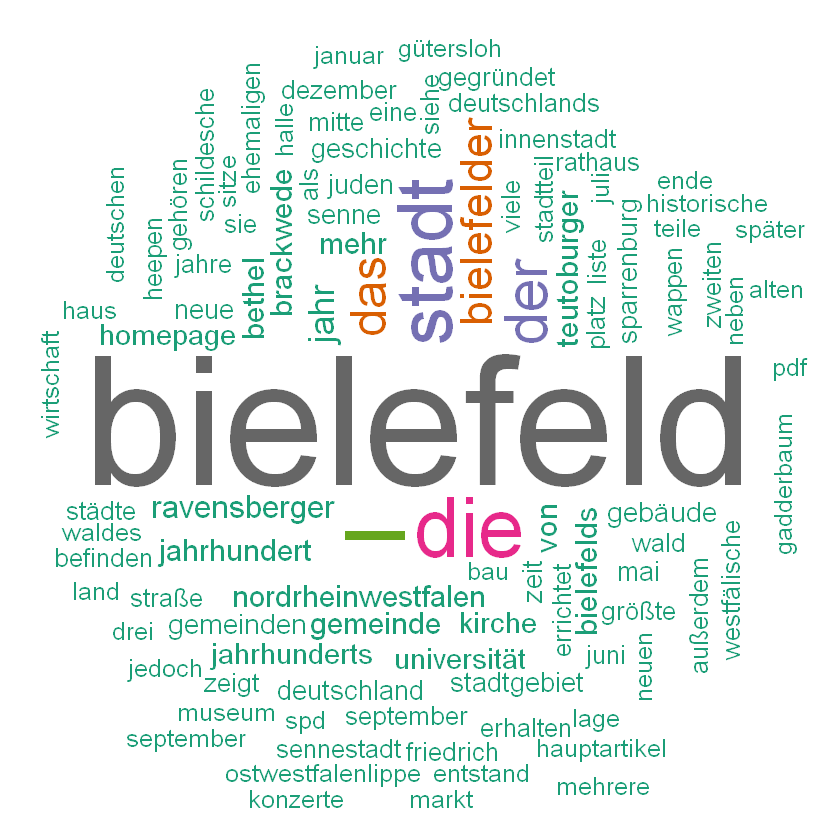

In [19]:
#Festlegen einer "Vorlage" für die WordCloud, damit diese reproduziert werden kann und nicht
#bei jeder Erstellung zufällig erstellt wird
set.seed(1234)


#Erstellen der WordCloud - die Wörter mit der höchsten Frequenz (freq) werden am gröten dargestellt
#die minimale Frequenz damit ein Wort dargestellt wird ist 1
#die WordCloud besteht aus max. 100 W?rtern (max.Words)
#die Anordnung ist nicht zufällig
#rot.per --> legt fest welcher Anteil an W?rtern nicht waagerecht dargestellt wird
w <- wordcloud(words = d_down$word, freq = d_down$freq,scale=c(8,1), min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))


## Anmerkung zum Unterschied Textdatei und Webdokument
Wie Du siehst, sind die WordClouds, die auf den unterschiedlichen Grundlagen, einmal der *Textdatei* und einmal der *abgerufenen Website* nicht komplett identisch. Gerade die abgerufene Website beinhaltet noch andere Textelemte wie z.B. die Einzelnachweise des Artikels oder auch die "Liste Deutscher Großstädte". Wir haben also beim Abrufen des Artikels von der Website nicht exakt die gleiche Grundlage, wie bei der Textdatei des Artikels. 

Dies muss unbedingt bei der Auswertung der beiden WordClouds berücksichtigt werden. Auch die Aufbereitung wird hierdurch beeinflusst. Beispielsweise ist bei den Stop-Words für die Website ein Hinzufügen der Abkürzung "isbn" notwendig, ein Wort das beispielsweise in der Textdatei überhaupt nicht vorkommt.

# Abschluss
Wir haben gesehen, die Erstellung von WordClouds ist auf Grundlage der unterschiedlichsten Text-Grundlagen als auch Formate in denen die Texte vorliegen möglich. Je nach Grundlage und Format ist eine dementsprechende sorgfältige und unterschiedliche Aufbereitung notwendig.

Beachtest Du dies und kommunizierst offen und transparent, wie Deine WordCloud entstanden ist und auf welcher Datengrundlage sie beruht, steht einer Verwendung bei der nächsten Visualisierung von Daten nichts mehr im Weg!